In [1]:
%load_ext autoreload
%autoreload 2

import os

print("original dir: ", os.getcwd())

if os.getcwd().endswith("3.0A"):
    new_path = "../"
    os.chdir(new_path)
    print("changed dir: ", os.getcwd())

original dir:  e:\SUSTech-Battery\data_our_refined\3.0A
changed dir:  e:\SUSTech-Battery\data_our_refined


In [2]:
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use(style="seaborn-v0_8-talk")
sns.set_theme(style="darkgrid")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from battery_predictor import BatteryPredictor
from battery_dataset import BatteryDataset

cpu


In [5]:
curves4, labels4 = utils.read_data(
    capacity_file="./3.0A/4/capacity.xlsx", curve_file="./3.0A/4/curve.xlsx"
)

curves5, labels5 = utils.read_data(
    capacity_file="./3.0A/5/capacity.xlsx", curve_file="./3.0A/5/curve.xlsx"
)

curves6, labels6 = utils.read_data(
    capacity_file="./3.0A/6/capacity.xlsx", curve_file="./3.0A/6/curve.xlsx"
)

d:\Miniconda3\envs\battery\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Total 920 curves, Total 920 labels
The first curve has 174 data points and 5 stages


In [6]:
delta_t = 30 # s

Vh = 4.2  # V
Vl = 4.0  # V

Ih = 3.0  # A
Il = 0.5  # A

NUM_V = 20
NUM_I = 6

In [8]:
path = "./3.0A/battery_predictor-3A.pth"
predictor = BatteryPredictor(input_len=NUM_V + NUM_I).to(device)
predictor.load_state_dict(torch.load(path))

<All keys matched successfully>

In [14]:
MIN_X = np.load("./3.0A/tmp/MIN_X.npy")
MAX_X = np.load("./3.0A/tmp/MAX_X.npy")
MIN_Y = np.load("./3.0A/tmp/MIN_Y.npy")
MAX_Y = np.load("./3.0A/tmp/MAX_Y.npy")

In [19]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(list(range(1, len(y_true) + 1)), y_true, label="True")
    plt.scatter(
        list(range(1, len(y_pred) + 1)), y_pred, label="Predicted", color="orange", s=2
    )
    plt.title("Predictions", fontsize=20)
    plt.xlabel("Cycle", fontsize=16)
    plt.ylabel("Capacity (Ah)", fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

In [20]:
from sklearn.metrics import root_mean_squared_error


def evaluate(curves, labels):
    data_X_v, data_X_i, data_y = utils.get_training_data(curves, labels, NUM_V, NUM_I)

    print(f"原始数量    -> {len(curves)}")
    print(f"训练数量    -> 横流充电电压：{len(data_X_v)}，恒压充电电流：{len(data_X_i)}")
    print(
        f"数据长度    -> 横流充电电压：{len(data_X_v[0])}，恒压充电电流：{len(data_X_i[0])}"
    )
    print(f"采样间隔    -> {delta_t}s")
    print(f"CC阶段电流  -> {Ih}A")
    print(f"CC阶段电压  -> {Vl}-{Vh}V")
    print(f"CV阶段电压  -> {4.2}V")
    print(f"CV阶段电流  -> {Ih}-{Il}A")
    print('-'*50)

    X = torch.concatenate([torch.tensor(data_X_v), torch.tensor(data_X_i)], dim=1).to(device)
    y = torch.tensor(data_y).to(device)

    # calculate the error
    y_true = y.cpu().numpy()
    predictor.eval()
    X = (X - MIN_X) / (MAX_X - MIN_X)
    with torch.no_grad():
        y_pred = predictor(X.float()).cpu().numpy().flatten()
    y_pred = (y_pred * (MAX_Y - MIN_Y)) + MIN_Y

    print(f"shape: y_true {y_true.shape}, y_pred {y_pred.shape}")
    
    print(f"RMSE: {root_mean_squared_error(y_true, y_pred):.5f} Ah")

    error = np.abs(y_pred - y_true)
    print(f"Mean error: {error.mean():.5f} Ah")

    relative_error = error / y_true
    print(f"Mean relative error: {relative_error.mean():.5f}")

    print(f"error shape: {error.shape}, relative_error shape: {relative_error.shape}")

    plot_predictions(y_true, y_pred)

battery 4
第681组数据的电压数据不足，跳过
第682组数据的电压数据不足，跳过
第683组数据的电压数据不足，跳过
第684组数据的电压数据不足，跳过
第685组数据的电压数据不足，跳过
第686组数据的电压数据不足，跳过
第687组数据的电压数据不足，跳过
第688组数据的电压数据不足，跳过
第689组数据的电压数据不足，跳过
第690组数据的电压数据不足，跳过
--------------------------------------------------
原始数量    -> 893
训练数量    -> 横流充电电压：883，恒压充电电流：883
数据长度    -> 横流充电电压：20，恒压充电电流：6
采样间隔    -> 30s
CC阶段电流  -> 3.0A
CC阶段电压  -> 4.0-4.2V
CV阶段电压  -> 4.2V
CV阶段电流  -> 3.0-0.5A
--------------------------------------------------
shape: y_true (883,), y_pred (883,)
RMSE: 0.01342 Ah
Mean error: 0.00891 Ah
Mean relative error: 0.00512
error shape: (883,), relative_error shape: (883,)


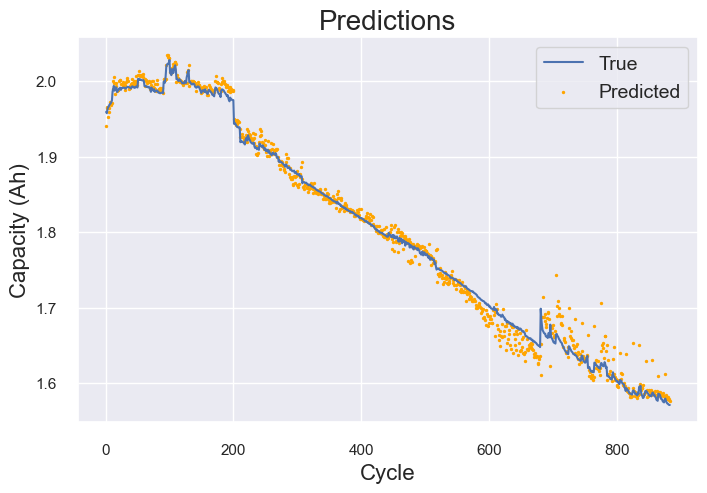

battery 5
第691组数据的电压数据不足，跳过
第692组数据的电压数据不足，跳过
第693组数据的电压数据不足，跳过
第694组数据的电压数据不足，跳过
第695组数据的电压数据不足，跳过
第696组数据的电压数据不足，跳过
第697组数据的电压数据不足，跳过
第698组数据的电压数据不足，跳过
第699组数据的电压数据不足，跳过
第700组数据的电压数据不足，跳过
--------------------------------------------------
原始数量    -> 844
训练数量    -> 横流充电电压：834，恒压充电电流：834
数据长度    -> 横流充电电压：20，恒压充电电流：6
采样间隔    -> 30s
CC阶段电流  -> 3.0A
CC阶段电压  -> 4.0-4.2V
CV阶段电压  -> 4.2V
CV阶段电流  -> 3.0-0.5A
--------------------------------------------------
shape: y_true (834,), y_pred (834,)
RMSE: 0.01844 Ah
Mean error: 0.01480 Ah
Mean relative error: 0.00825
error shape: (834,), relative_error shape: (834,)


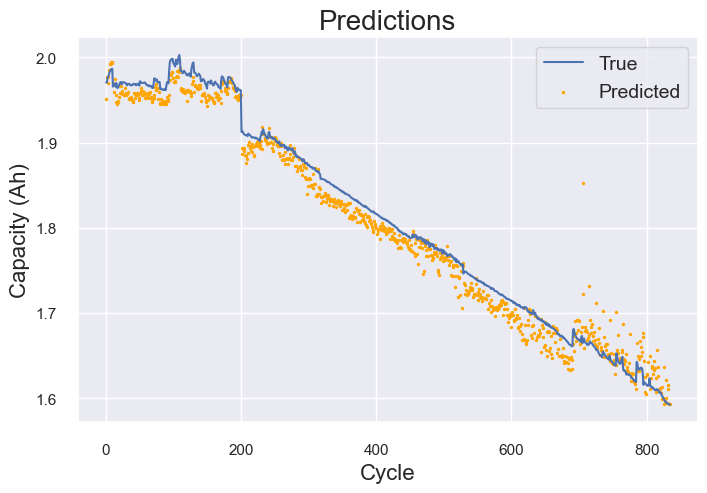

battery 6
--------------------------------------------------
原始数量    -> 920
训练数量    -> 横流充电电压：920，恒压充电电流：920
数据长度    -> 横流充电电压：20，恒压充电电流：6
采样间隔    -> 30s
CC阶段电流  -> 3.0A
CC阶段电压  -> 4.0-4.2V
CV阶段电压  -> 4.2V
CV阶段电流  -> 3.0-0.5A
--------------------------------------------------
shape: y_true (920,), y_pred (920,)
RMSE: 0.03043 Ah
Mean error: 0.02267 Ah
Mean relative error: 0.01326
error shape: (920,), relative_error shape: (920,)


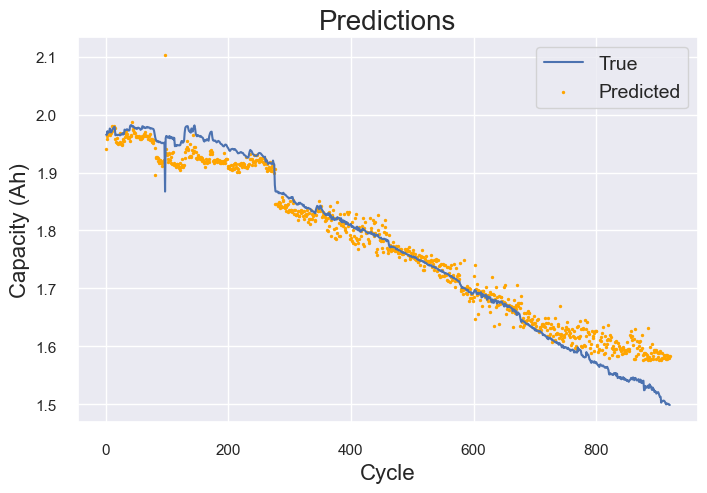

In [21]:
print("battery 4")
evaluate(curves4, labels4)
print("battery 5")
evaluate(curves5, labels5)
print("battery 6")
evaluate(curves6, labels6)

保存 capacity 的标签值和预测值

In [9]:
import json
def save_predictions(predictor, curves, labels, battery_code):
    data_X_v, data_X_i, data_y = utils.get_training_data(curves, labels, NUM_V, NUM_I)

    X = torch.concatenate([torch.tensor(data_X_v), torch.tensor(data_X_i)], dim=1).to(device)
    y = torch.tensor(data_y).to(device)
    
    info = {
        "original data points number": len(curves),
        "training data points number": f"CC Voltage: {len(data_X_v)}, CV Current: {len(data_X_i)}",
        "length of single data point": f"CC Voltage: {len(data_X_v[0])}, CV Current: {len(data_X_i[0])}",
        "delta t": f"{delta_t}s",
        "CC Current": f"{Ih}A",
        "CC Voltage": f"{Vl}-{Vh}V",
        "CV Voltage": f"{4.2}V",
        "CV Current": f"{Ih}-{Il}A",
    }
    print(info)
    with open(f'./{battery_code}/info.json', 'w') as f:
        json.dump(info, f)
    print(f"Save info to ./{battery_code}/info.json")

    predictor.eval()
    with torch.no_grad():
        y_pred = predictor(X.float()).cpu().numpy()

    np.save(f'./{battery_code}/true_capacity.npy', y.cpu().numpy())
    np.save(f'./{battery_code}/pred_capacity.npy', y_pred)
    print(f"Save predictions to ./{battery_code}/predicted_capacity.npy")
    

In [10]:
save_predictions(predictor, curves3, labels3, "3")
save_predictions(predictor, curves4, labels4, "4")
save_predictions(predictor, curves5, labels5, "5")

--------------------------------------------------
{'original data points number': 679, 'training data points number': 'CC Voltage: 679, CV Current: 679', 'length of single data point': 'CC Voltage: 20, CV Current: 6', 'delta t': '30s', 'CC Current': '3.0A', 'CC Voltage': '4.0-4.2V', 'CV Voltage': '4.2V', 'CV Current': '3.0-0.5A'}


FileNotFoundError: [Errno 2] No such file or directory: './3/info.json'